# Shapely

The Shapely library helps us create geometries (points, lines, polygons) that we can overlay on maps.  This is what is used in underlying cartopy plots.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy
import shapely

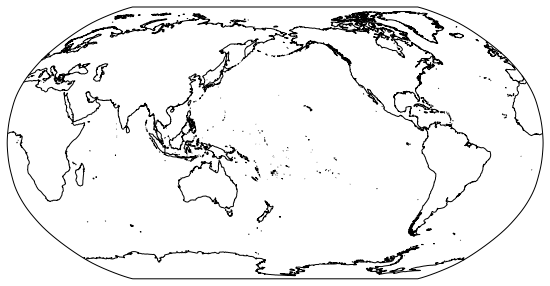

In [2]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

**Say we want to add a point, line, or box to this map to display on a plot.**

### Example for adding a point:

In [3]:
point_irvine = shapely.geometry.Point(242.1735, 33.6846)
point_beijing = shapely.geometry.Point(116.4074, 39.9042)

242.1735 33.6846
<class 'shapely.geometry.point.Point'>


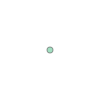

In [4]:
print(point_irvine.x, point_irvine.y)

print(type(point_irvine))
point_irvine

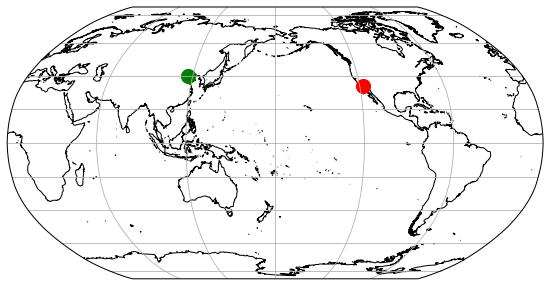

In [5]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

# add point geometry
ax.scatter(point_irvine.x, point_irvine.y, transform=cartopy.crs.PlateCarree(), s=200, c='red', zorder=2)
ax.scatter(point_beijing.x, point_beijing.y, transform=cartopy.crs.PlateCarree(), s=200, c='green', zorder=2)

ax.gridlines()
ax.set_global()

### Example for adding a box:

In [6]:
lon_lo, lon_hi, lat_lo, lat_hi = -130,-50,30.,60.

box = shapely.geometry.box(lon_lo, lat_lo, lon_hi, lat_hi)

(-130.0, 30.0, -50.0, 60.0) 2400.0
<class 'shapely.geometry.polygon.Polygon'>


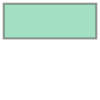

In [7]:
print(box.bounds, box.area)
print(type(box))
box

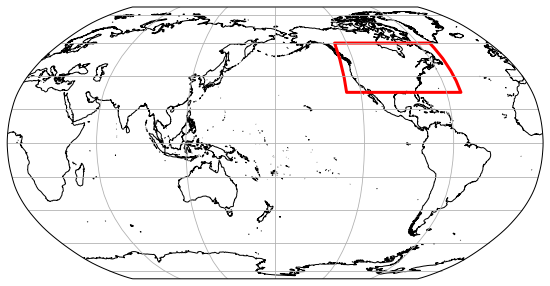

In [8]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

# add box geometry
ax.add_geometries([box], crs=cartopy.crs.PlateCarree(), edgecolor='red', facecolor='None', lw=3)

ax.gridlines()
ax.set_global()

### Example for adding a line between two points:

Easiest approach is to use the ```.plot([x values], [y values])``` syntax

<class 'shapely.geometry.linestring.LineString'>


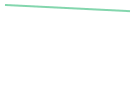

In [9]:
line = shapely.geometry.LineString([(242.1735, 33.6846),
                                    (116.4074, 39.9042)])

print(type(line))
line

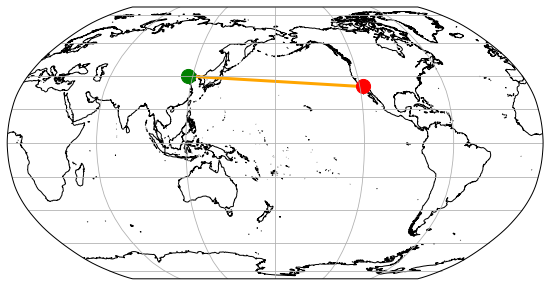

In [10]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

# add point geometry
ax.scatter(point_irvine.x, point_irvine.y, s=200, c='red', zorder=2, transform=cartopy.crs.PlateCarree())
ax.scatter(point_beijing.x, point_beijing.y, transform=cartopy.crs.PlateCarree(), s=200, c='green', zorder=2)

# add lines
# ax.plot([point_beijing.x,point_irvine.x], 
#         [point_beijing.y, point_irvine.y],
#         color='dodgerblue', lw=3,
#         transform=cartopy.crs.PlateCarree())

# ax.plot([point_beijing.x,point_irvine.x], 
#         [point_beijing.y, point_irvine.y],
#         color='dodgerblue', lw=3, ls='--',
#         transform=cartopy.crs.Geodetic())

ax.add_geometries([line], linewidth=3, edgecolor='orange', crs=cartopy.crs.PlateCarree())

ax.gridlines()
ax.set_global()

### Example for creating a polygon

<class 'shapely.geometry.polygon.Polygon'>


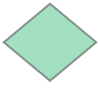

In [11]:
# add the vertices in order... create a diamond
polygon_vertices = [(180,25),
                    (210,0),
                    (180,-25),
                    (150,0)]

polygon = shapely.geometry.Polygon(polygon_vertices)
print(type(polygon))
polygon

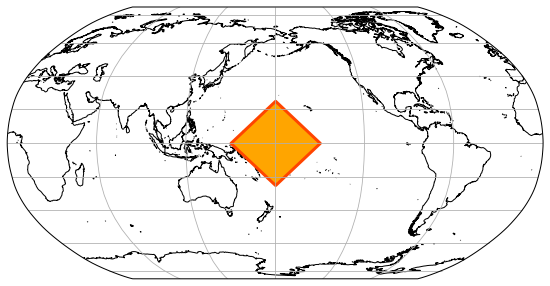

In [12]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
#map_crs = cartopy.crs.InterruptedGoodeHomolosine()
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

# add polygon geometry
ax.add_geometries([polygon], crs=cartopy.crs.PlateCarree(), facecolor='orange', edgecolor='orangered', lw=3)

ax.gridlines()
ax.set_global()

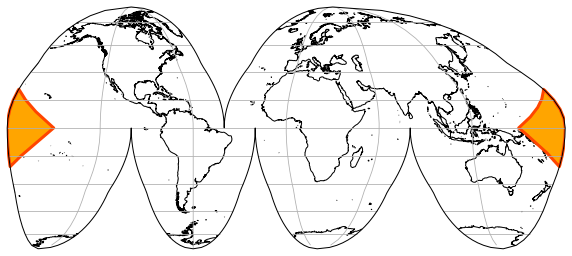

In [13]:
#1: specify projection info
#map_crs = cartopy.crs.Robinson(central_longitude=180.)
map_crs = cartopy.crs.InterruptedGoodeHomolosine()
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

# add polygon geometry
ax.add_geometries([polygon], crs=cartopy.crs.PlateCarree(), facecolor='orange', edgecolor='orangered', lw=3)

ax.gridlines()
ax.set_global()

# Key points

* Use the ```shapely``` library to create your own point, line, and polygon objects
* If you're connecting two points, typically it's easier to use ```.plot``` rather than constructing a full line, but they both work
* If you use latitude/longitude values when creating these objects, your crs will be ```cartopy.crs.PlateCarree()```
  * For ```ax.add_geometries()``` and ```ax.add_feature()```, specify the projection using the ```crs=``` keyword
  * For ```ax.plot()```, ```ax.contourf()```, ```ax.scatter```, specify the projection using the ```transform=``` keyword